# Dorm properties and individual well-being

Tries to explain individuals' spring well-being scores from their fall trait survey, fall well-being, and dorm-level averages of these measures. We use only participants who completed both the fall trait survey and spring network survey (in which the spring well-being measures are embedded), leaving an N of about 200.

**AIM:** We want to know things like: is the dorm's average level of Agreeableness related to individual change in well-being from fall to spring? What about the dorm's average extraversion? Empathy?

**RESULTS: [INCOMPLETE]**
1. An individual's spring well-being is strongly predicted by fall well-being, and other variables add only a little bit of extra explanatory power. Other variables considered include individual traits as well as the average traits of the person's participating dorm-mates.
1. There's a clear regression to the mean for individuals -- those who were extra happy in the fall tend to report being less happy in the spring, and those who are extra sad in the fall tend to report being less-sad in the spring. This is reasonable, as people who are having an especially good or bad day, when they take the test in the fall, are unlikely to have a similarly extreme day when tested in the spring.

**Procedure:**
1. Filter for students who participated in BOTH the fall trait survey AND the spring well-being/network survey.
1. Create a composite fall well-being measure from SWLS, Subjective Happiness, PSS, Loneliness, Anxiety, CESD
  * Spring well-being composite already exists, which is an average of ~15 questions about happiness, anxiety, stress, loneliness, etc (see below).
1. Standardize fall and spring well-being measures to 0 mean and unit variance.
1. Predict spring WB from fall WB
1. Predict spring WB from (fall WB + single IV) for each individual-level IV
1. Predict spring WB from (fall WB + single IV) for each dorm-level IV
1. Predict spring WB from all IVs, using LASSO regression and cross-validation

**(Reference): Spring well-being measure:**
1. I feel connected to my friends and family. (Wellbeing_self_17) 
1. I feel lonely. (Lonely) 
1. I feel stressed. (Stressed) 
1. I feel satisfied with my life. (Satisfied) 
1. I dwell on my negative feelings or problems. (Rumination) 
1. I feel that there were people I could talk to. (Wellbeing_self_18) 
1. I feel afraid or uncomfortable doing things (like speaking, eating, or writing) in front of other people. (Social_Anxiety) 
1. I feel content. (Wellbeing_self_22) 
1. I feel nervous or anxious. (Anxiety_1) 
1. I worry a lot about bad things that might happen. (Anxiety_2) 
1. I feel confident about my ability to handle my personal problems. (Wellbeing_self_19) 
1. I feel depressed or down. (Depression) 
1. I lack interest or pleasure in things I usually enjoy. (Anhedonia) 
1. I feel hopeful about the future. (Wellbeing_self_21) 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configure" data-toc-modified-id="Configure-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configure</a></span></li><li><span><a href="#Import-and-load" data-toc-modified-id="Import-and-load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and load</a></span></li><li><span><a href="#Glance-at-the-available-columns" data-toc-modified-id="Glance-at-the-available-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Glance at the available columns</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Remove-columns-we-don't-need" data-toc-modified-id="Remove-columns-we-don't-need-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Remove columns we don't need</a></span></li><li><span><a href="#Restrict-to-students-who-completed-both-the-trait-and-spring-wb-surveys" data-toc-modified-id="Restrict-to-students-who-completed-both-the-trait-and-spring-wb-surveys-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Restrict to students who completed both the <code>trait</code> and spring <code>wb</code> surveys</a></span></li><li><span><a href="#Create-fall-composite-well-being-score,-averaging-several-normalized-wb-related-columns" data-toc-modified-id="Create-fall-composite-well-being-score,-averaging-several-normalized-wb-related-columns-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Create fall composite well-being score, averaging several normalized wb-related columns</a></span></li><li><span><a href="#Standardize-spring-well-being-scores" data-toc-modified-id="Standardize-spring-well-being-scores-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Standardize spring well-being scores</a></span></li><li><span><a href="#Sanity-checks,-and-glance-at-well-being-change" data-toc-modified-id="Sanity-checks,-and-glance-at-well-being-change-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Sanity checks, and glance at well-being change</a></span><ul class="toc-item"><li><span><a href="#Drop-well-being-change-columns,-let-the-models-figure-out-if-it-matters" data-toc-modified-id="Drop-well-being-change-columns,-let-the-models-figure-out-if-it-matters-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Drop well-being-change columns, let the models figure out if it matters</a></span></li></ul></li></ul></li><li><span><a href="#Impute-the-(small-amount-of)-missing-data" data-toc-modified-id="Impute-the-(small-amount-of)-missing-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Impute the (small amount of) missing data</a></span><ul class="toc-item"><li><span><a href="#How-much-data-is-missing?-(A:-Not-much)" data-toc-modified-id="How-much-data-is-missing?-(A:-Not-much)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>How much data is missing? (A: Not much)</a></span></li></ul></li><li><span><a href="#Analyses:-individual-as-unit-of-analysis" data-toc-modified-id="Analyses:-individual-as-unit-of-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyses: <em>individual</em> as unit of analysis</a></span><ul class="toc-item"><li><span><a href="#Correlations-of-individual-features-with-spring-well-being-(partial---after-controlling-for-fall-well-being)" data-toc-modified-id="Correlations-of-individual-features-with-spring-well-being-(partial---after-controlling-for-fall-well-being)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Correlations of individual features with spring well-being (partial - after controlling for fall well-being)</a></span></li><li><span><a href="#Try-using-features-of-the-dorm-mates'-averages" data-toc-modified-id="Try-using-features-of-the-dorm-mates'-averages-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Try using features of the dorm-mates' averages</a></span><ul class="toc-item"><li><span><a href="#For-each-P,-we-want-to-compute-the-mean-traits-of-the-other-people-in-the-dorm.-This-is-a-little-annoying-to-do,-but-here-goes" data-toc-modified-id="For-each-P,-we-want-to-compute-the-mean-traits-of-the-other-people-in-the-dorm.-This-is-a-little-annoying-to-do,-but-here-goes-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>For each P, we want to compute the mean traits of the <em>other</em> people in the dorm. This is a little annoying to do, but here goes</a></span></li><li><span><a href="#Spot-check-one-participant" data-toc-modified-id="Spot-check-one-participant-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Spot check one participant</a></span></li><li><span><a href="#Merge-individual-features-and-dormmate-features" data-toc-modified-id="Merge-individual-features-and-dormmate-features-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Merge individual features and dormmate features</a></span></li><li><span><a href="#Run-correlations" data-toc-modified-id="Run-correlations-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Run correlations</a></span></li></ul></li><li><span><a href="#Omnibus-models:-full-on-machine-learning" data-toc-modified-id="Omnibus-models:-full-on-machine-learning-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Omnibus models: full-on machine learning</a></span></li><li><span><a href="#Inspect-best-fit-model" data-toc-modified-id="Inspect-best-fit-model-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Inspect best-fit model</a></span></li></ul></li><li><span><a href="#Analyses:-dorm-as-unit-of-analysis-(INCOMPLETE)" data-toc-modified-id="Analyses:-dorm-as-unit-of-analysis-(INCOMPLETE)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyses: <em>dorm</em> as unit of analysis (INCOMPLETE)</a></span><ul class="toc-item"><li><span><a href="#Compute-dorm-averages" data-toc-modified-id="Compute-dorm-averages-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Compute dorm averages</a></span></li><li><span><a href="#First-order-correlations-with-spring-well-being" data-toc-modified-id="First-order-correlations-with-spring-well-being-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>First-order correlations with spring well-being</a></span></li></ul></li></ul></div>

## Configure

In [1]:
MERGED_DATAFILE = 'data/postprocessed/merged.csv'
PLOT_DIR = 'plots/'
SHUFFLE_DORMS = False
SHUFFLE_WELLBEING = False

## Import and load

In [2]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

# Plot directly in notebook
# NOTE: break this command into it's own cell, and run
# it BEFORE everything below it. Unfortunately that's
# the only way to get the plot settings to stick.
%matplotlib inline

Everett Wetchler 2019-12-04 11:40:04 PST 

CPython 3.6.5
IPython 7.8.0

numpy 1.17.3
pandas 0.25.1
matplotlib 3.1.0
seaborn 0.9.0
watermark 2.0.1


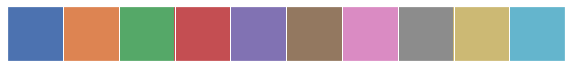

In [3]:
import datetime as dt
import os
import random
import re
import simplejson as json

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

# Customize default chart graphics
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# It's useful to have some named colors handy
(SNS_BLUE, SNS_ORANGE, SNS_GREEN,
 SNS_RED, SNS_PURPLE, SNS_BROWN,
 SNS_PINK, SNS_GRAY, SNS_YELLOW,
 SNS_CYAN) = sns.color_palette()
sns.palplot(sns.color_palette())

# Watermark extension to print version/system information
# Flags:
# -a [author] --v (python/ipython versions) -d (date)
# -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version)
# -p [packages] (package info)
%load_ext watermark
%watermark -a 'Everett Wetchler' -v -d -t -z -w -p numpy,pandas,matplotlib,seaborn

####################################################
# END Boilerplate
####################################################

In [4]:
df = pd.read_csv(MERGED_DATAFILE)
assert len(df) == len(set(df['PID'])), "Found duplicate PIDs!"
df.set_index('PID', inplace=True)
print(df.shape)
df.head()

(1045, 83)


,NID,Extraversion_prefrosh,BAS_prefrosh,NTB_prefrosh,EC_prefrosh,PD_prefrosh,PT_prefrosh,Prosociality_prefrosh,Loneliness_prefrosh,Loneliness_R_prefrosh,PSS_prefrosh,PSS_R_prefrosh,Subj_Happiness_prefrosh,SWL_prefrosh,MalleableEmpathy_prefrosh,EMPATHY_prefrosh,POSITIVITY_prefrosh,NEGATIVITY_prefrosh,LIFE_SATISFACTION_prefrosh,Extraversion_trait,Agreeableness_trait,Openness_trait,Conscientiousness_trait,NPI_trait,Positive_empathy_trait,Pos_efficacy_trait,Neg_efficacy_trait,Pos_tendency_trait,Neg_Tendency_trait,CESD_trait,STAI_Anxiety_trait,Need_Belong_trait,Prosociality_trait,Loneliness_trait,PSS_trait,SubjHappiness_trait,SWLS_trait,Emp_theory_trait,RS_1_trait,RS_2_trait,Self_Esteem_trait,Self_monitor_trait,Distress_Disclosure_trait,Guidance_trait,Warmth_trait,Integration_trait,Attachment_trait,Nurturance_trait,Reliable_trait,Anticipated_Risks_trait,Anticipated_Benefits_trait,PI_trait,SI_trait,CI_trait,BFNE_trait,BAS_drive_trait,BAS_Fun_seeking_trait,BAS_Fun_Reward_responsiveness_trait,Suppression_trait,Cogntive_Reappraisal_trait,Extensic_improve_trait,Extensic_worse_trait,Intrinsic_imrpove_trait,Intrinsic_worse_trait,Empathic_Concern_trait,Perspective_Taking_trait,Personal_Distress_trait,Wellbeing_self_17_wb,Lonely_wb,Stressed_wb,Satisfied_wb,Rumination_wb,Wellbeing_self_18_wb,Social_Anxiety_wb,Wellbeing_self_22_wb,Anxiety_1_wb,Anxiety_2_wb,Wellbeing_self_19_wb,Depression_wb,Anhedonia_wb,Wellbeing_self_21_wb,Belonging_wb,Wellbeing_wb
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
UPl0A7hyV0,NaN,1.000,1.769231,2.1,3.00,1.50,3.00,3.166667,1.750,2.250,1.00,3.00,4.00,3.8,4.000000,3.291667,1.384615,1.800,3.26250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ra1xsp248Q,NaN,1.875,2.461538,3.0,3.75,1.25,2.75,3.833333,1.875,2.125,2.50,1.50,2.75,4.4,3.333333,3.416667,2.168269,2.125,2.69375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IqidLJtjxg,11.0,2.875,2.461538,1.8,3.25,2.00,3.00,3.250000,1.000,3.000,0.25,3.75,5.00,5.2,2.000000,2.875000,2.668269,1.900,4.23750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR9ggA8Ajc,9.0,3.375,2.461538,2.4,2.25,1.00,1.75,2.750000,0.750,3.250,1.50,2.50,4.75,6.0,4.333333,2.770833,2.918269,1.700,4.12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.714286
vgxlTMkQs5,7.0,1.250,1.769231,3.4,3.00,1.25,3.00,2.833333,2.750,1.250,2.50,1.50,1.25,3.0,2.000000,2.708333,1.509615,2.325,1.75000,4.0,4.0,5.5,4.5,4.333333,5.142857,7.5,6.25,5.25,3.75,3.1,3.684211,4.2,2.666667,2.375,3.25,4.25,4.2,3.0,6.25,5.5,3.1,19.0,3.071429,2.5,3.5,2.5,3.25,2.75,2.5,5.75,5.0,5.0,4.25,2.375,4.857143,3.25,3.0,4.2,7.0,4.166667,5.833333,2.0,3.0,5.5,2.166667,1.857143,1.428571,3.0,3.0,1.0,2.0,1.0,3.0,3.0,2.0,0.0,1.0,2.0,2.0,3.0,1.0,3.0,1.928571


## Glance at the available columns

In [5]:
print("Prefrosh:")
[c for c in df.columns if c.endswith('_prefrosh')]

Prefrosh:


['Extraversion_prefrosh',
 'BAS_prefrosh',
 'NTB_prefrosh',
 'EC_prefrosh',
 'PD_prefrosh',
 'PT_prefrosh',
 'Prosociality_prefrosh',
 'Loneliness_prefrosh',
 'Loneliness_R_prefrosh',
 'PSS_prefrosh',
 'PSS_R_prefrosh',
 'Subj_Happiness_prefrosh',
 'SWL_prefrosh',
 'MalleableEmpathy_prefrosh',
 'EMPATHY_prefrosh',
 'POSITIVITY_prefrosh',
 'NEGATIVITY_prefrosh',
 'LIFE_SATISFACTION_prefrosh']

In [6]:
print("Trait:")
[c for c in df.columns if c.endswith('_trait')]

Trait:


['Extraversion_trait',
 'Agreeableness_trait',
 'Openness_trait',
 'Conscientiousness_trait',
 'NPI_trait',
 'Positive_empathy_trait',
 'Pos_efficacy_trait',
 'Neg_efficacy_trait',
 'Pos_tendency_trait',
 'Neg_Tendency_trait',
 'CESD_trait',
 'STAI_Anxiety_trait',
 'Need_Belong_trait',
 'Prosociality_trait',
 'Loneliness_trait',
 'PSS_trait',
 'SubjHappiness_trait',
 'SWLS_trait',
 'Emp_theory_trait',
 'RS_1_trait',
 'RS_2_trait',
 'Self_Esteem_trait',
 'Self_monitor_trait',
 'Distress_Disclosure_trait',
 'Guidance_trait',
 'Warmth_trait',
 'Integration_trait',
 'Attachment_trait',
 'Nurturance_trait',
 'Reliable_trait',
 'Anticipated_Risks_trait',
 'Anticipated_Benefits_trait',
 'PI_trait',
 'SI_trait',
 'CI_trait',
 'BFNE_trait',
 'BAS_drive_trait',
 'BAS_Fun_seeking_trait',
 'BAS_Fun_Reward_responsiveness_trait',
 'Suppression_trait',
 'Cogntive_Reappraisal_trait',
 'Extensic_improve_trait',
 'Extensic_worse_trait',
 'Intrinsic_imrpove_trait',
 'Intrinsic_worse_trait',
 'Empathic_Co

In [7]:
print("Spring well-being:")
[c for c in df.columns if c.endswith('_wb')]

Spring well-being:


['Wellbeing_self_17_wb',
 'Lonely_wb',
 'Stressed_wb',
 'Satisfied_wb',
 'Rumination_wb',
 'Wellbeing_self_18_wb',
 'Social_Anxiety_wb',
 'Wellbeing_self_22_wb',
 'Anxiety_1_wb',
 'Anxiety_2_wb',
 'Wellbeing_self_19_wb',
 'Depression_wb',
 'Anhedonia_wb',
 'Wellbeing_self_21_wb',
 'Belonging_wb',
 'Wellbeing_wb']

## Data Preparation

### Remove columns we don't need

In [8]:
# Drop all prefrosh columns
df = df[[c for c in df if not c.endswith('_prefrosh')]]
# Drop all spring-wellbeing columns except the composite
df = df.drop(columns=[c for c in df.columns if c.endswith('_wb') and c != 'Wellbeing_wb'])
print(df.shape)
df.head()

(1045, 50)


,NID,Extraversion_trait,Agreeableness_trait,Openness_trait,Conscientiousness_trait,NPI_trait,Positive_empathy_trait,Pos_efficacy_trait,Neg_efficacy_trait,Pos_tendency_trait,Neg_Tendency_trait,CESD_trait,STAI_Anxiety_trait,Need_Belong_trait,Prosociality_trait,Loneliness_trait,PSS_trait,SubjHappiness_trait,SWLS_trait,Emp_theory_trait,RS_1_trait,RS_2_trait,Self_Esteem_trait,Self_monitor_trait,Distress_Disclosure_trait,Guidance_trait,Warmth_trait,Integration_trait,Attachment_trait,Nurturance_trait,Reliable_trait,Anticipated_Risks_trait,Anticipated_Benefits_trait,PI_trait,SI_trait,CI_trait,BFNE_trait,BAS_drive_trait,BAS_Fun_seeking_trait,BAS_Fun_Reward_responsiveness_trait,Suppression_trait,Cogntive_Reappraisal_trait,Extensic_improve_trait,Extensic_worse_trait,Intrinsic_imrpove_trait,Intrinsic_worse_trait,Empathic_Concern_trait,Perspective_Taking_trait,Personal_Distress_trait,Wellbeing_wb
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
UPl0A7hyV0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ra1xsp248Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IqidLJtjxg,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR9ggA8Ajc,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.714286
vgxlTMkQs5,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.5,6.25,5.25,3.75,3.1,3.684211,4.2,2.666667,2.375,3.25,4.25,4.2,3.0,6.25,5.5,3.1,19.0,3.071429,2.5,3.5,2.5,3.25,2.75,2.5,5.75,5.0,5.0,4.25,2.375,4.857143,3.25,3.0,4.2,7.0,4.166667,5.833333,2.0,3.0,5.5,2.166667,1.857143,1.428571,1.928571


### Restrict to students who completed both the `trait` and spring `wb` surveys

Also delete the prefrosh data altogether, for this analysis

In [9]:
trait_cols = [c for c in df.columns if c.endswith('_trait')]
print("Non-null values in trait surveys")
trait_notnull = df[trait_cols].notnull().sum(axis=1)
trait_notnull.value_counts().sort_index()

Non-null values in trait surveys


0     740
43      2
46      3
48    300
dtype: int64

In [10]:
wb_cols = [c for c in df.columns if c.endswith('_wb')]
print("Non-null values in spring WB survey")
wb_notnull = df[wb_cols].notnull().sum(axis=1)
wb_notnull.value_counts().sort_index()

Non-null values in spring WB survey


0    531
1    514
dtype: int64

In [11]:
complete = (trait_notnull > 0) & (wb_notnull > 0)
print(complete.value_counts())

False    849
True     196
dtype: int64


In [12]:
df = df[complete]
df = df[[c for c in df.columns if not c.endswith('_prefrosh')]]
new_colnames = []
for c in df.columns:
    if c.endswith('_trait'):
        new_colnames.append(c[:-6])
    elif c == 'Wellbeing_wb':
        new_colnames.append('Wellbeing_spring')
    else:
        new_colnames.append(c)
df.columns = new_colnames
print(df.shape)
df.head()

(196, 50)


,NID,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,CESD,STAI_Anxiety,Need_Belong,Prosociality,Loneliness,PSS,SubjHappiness,SWLS,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_spring
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,3.1,3.684211,4.2,2.666667,2.375,3.25,4.25,4.2,3.000000,6.250,5.500,3.1,19.0,3.071429,2.50,3.5,2.5,3.25,2.75,2.50,5.75,5.00,5.000000,4.25,2.375,4.857143,3.25,3.0,4.2,7.00,4.166667,5.833333,2.0,3.000000,5.50,2.166667,1.857143,1.428571,1.928571
M9obKkDvc0,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,2.4,2.473684,6.0,4.000000,1.750,2.00,8.00,7.0,3.000000,7.250,7.250,2.2,14.0,6.000000,5.00,5.0,5.0,5.00,5.00,5.00,5.00,5.00,5.000000,5.00,5.000,6.000000,5.00,5.0,5.0,8.00,8.000000,6.000000,6.0,6.000000,6.00,2.833333,2.571429,2.000000,2.500000
RdS4vMvQjo,9.0,3.0,6.0,6.5,6.0,3.533333,4.142857,5.50,6.75,5.50,5.00,3.1,3.473684,4.0,2.750000,1.375,1.00,6.25,7.2,3.166667,4.625,5.375,1.8,10.0,2.857143,4.00,3.0,3.5,2.75,2.25,4.00,4.75,4.25,4.833333,3.75,3.500,2.857143,3.00,4.0,3.8,3.25,5.666667,3.166667,2.0,3.666667,2.00,2.500000,2.142857,1.285714,3.071429
n08loMfJH7,4.0,4.0,5.5,6.5,6.5,4.000000,4.714286,6.00,6.75,5.50,5.25,2.9,2.368421,4.0,3.000000,1.000,1.00,5.50,6.4,3.333333,6.250,5.375,2.0,13.0,3.000000,2.75,3.0,3.0,3.00,2.75,3.25,5.25,4.50,5.166667,4.50,4.000,3.857143,4.25,4.0,4.4,4.25,5.833333,4.000000,2.0,3.500000,2.25,2.833333,2.142857,0.857143,2.928571
8rsekwqjFy,5.0,4.5,5.0,6.0,6.0,3.800000,5.000000,7.50,7.25,5.75,5.00,2.7,2.736842,4.1,2.666667,1.250,1.25,7.00,7.0,3.666667,4.875,6.375,1.8,18.0,2.857143,3.50,3.0,3.5,3.00,3.00,3.00,5.00,4.50,5.333333,3.50,4.000,3.000000,4.00,4.5,4.8,5.25,6.166667,5.333333,2.0,5.000000,2.25,2.666667,2.142857,2.000000,2.500000


In [13]:
len(df), len(set(df.index))

(196, 196)

In [14]:
df['NID'].value_counts().sort_index()

1.0     13
2.0     22
4.0     31
5.0     15
7.0     23
8.0     21
9.0      6
10.0    16
11.0    14
13.0    20
15.0    15
Name: NID, dtype: int64

### Create fall composite well-being score, averaging several normalized wb-related columns

This is intended to roughly correspond to the content of the spring well-being score, as we don't have the exact same survey in the early fall

In [15]:
composite_cols_pos = ['SWLS', 'SubjHappiness']
composite_cols_neg = ['PSS', 'Loneliness', 'STAI_Anxiety', 'CESD']
# Normalize so these are evenly weighted
normed_cols = [(df[c] - df[c].mean()) / df[c].std() for c in composite_cols_pos]
normed_cols.extend([-(df[c] - df[c].mean()) / df[c].std() for c in composite_cols_neg])
fall_wb = pd.DataFrame(normed_cols).T.mean(axis=1)
# Normalize the final composite scale too, as the units have no meaning
fall_wb = (fall_wb - fall_wb.mean()) / fall_wb.std()
df.insert(len(df.columns) - 1, 'Wellbeing_fall', fall_wb)
df = df.drop(columns=composite_cols_pos + composite_cols_neg)
df.head()

,NID,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,4.2,2.666667,3.000000,6.250,5.500,3.1,19.0,3.071429,2.50,3.5,2.5,3.25,2.75,2.50,5.75,5.00,5.000000,4.25,2.375,4.857143,3.25,3.0,4.2,7.00,4.166667,5.833333,2.0,3.000000,5.50,2.166667,1.857143,1.428571,-1.818785,1.928571
M9obKkDvc0,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,6.0,4.000000,3.000000,7.250,7.250,2.2,14.0,6.000000,5.00,5.0,5.0,5.00,5.00,5.00,5.00,5.00,5.000000,5.00,5.000,6.000000,5.00,5.0,5.0,8.00,8.000000,6.000000,6.0,6.000000,6.00,2.833333,2.571429,2.000000,0.851448,2.500000
RdS4vMvQjo,9.0,3.0,6.0,6.5,6.0,3.533333,4.142857,5.50,6.75,5.50,5.00,4.0,2.750000,3.166667,4.625,5.375,1.8,10.0,2.857143,4.00,3.0,3.5,2.75,2.25,4.00,4.75,4.25,4.833333,3.75,3.500,2.857143,3.00,4.0,3.8,3.25,5.666667,3.166667,2.0,3.666667,2.00,2.500000,2.142857,1.285714,0.205617,3.071429
n08loMfJH7,4.0,4.0,5.5,6.5,6.5,4.000000,4.714286,6.00,6.75,5.50,5.25,4.0,3.000000,3.333333,6.250,5.375,2.0,13.0,3.000000,2.75,3.0,3.0,3.00,2.75,3.25,5.25,4.50,5.166667,4.50,4.000,3.857143,4.25,4.0,4.4,4.25,5.833333,4.000000,2.0,3.500000,2.25,2.833333,2.142857,0.857143,0.697224,2.928571
8rsekwqjFy,5.0,4.5,5.0,6.0,6.0,3.800000,5.000000,7.50,7.25,5.75,5.00,4.1,2.666667,3.666667,4.875,6.375,1.8,18.0,2.857143,3.50,3.0,3.5,3.00,3.00,3.00,5.00,4.50,5.333333,3.50,4.000,3.000000,4.00,4.5,4.8,5.25,6.166667,5.333333,2.0,5.000000,2.25,2.666667,2.142857,2.000000,0.820155,2.500000


### Standardize spring well-being scores

In [16]:
df['Wellbeing_spring'] = (df['Wellbeing_spring'] - df['Wellbeing_spring'].mean()) / df['Wellbeing_spring'].std()

### Sanity checks, and glance at well-being change

In [17]:
df['Wellbeing_change'] = df['Wellbeing_spring'] - df['Wellbeing_fall']
df.head()

,NID,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring,Wellbeing_change
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,4.2,2.666667,3.000000,6.250,5.500,3.1,19.0,3.071429,2.50,3.5,2.5,3.25,2.75,2.50,5.75,5.00,5.000000,4.25,2.375,4.857143,3.25,3.0,4.2,7.00,4.166667,5.833333,2.0,3.000000,5.50,2.166667,1.857143,1.428571,-1.818785,-0.752480,1.066306
M9obKkDvc0,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,6.0,4.000000,3.000000,7.250,7.250,2.2,14.0,6.000000,5.00,5.0,5.0,5.00,5.00,5.00,5.00,5.00,5.000000,5.00,5.000,6.000000,5.00,5.0,5.0,8.00,8.000000,6.000000,6.0,6.000000,6.00,2.833333,2.571429,2.000000,0.851448,-0.039556,-0.891005
RdS4vMvQjo,9.0,3.0,6.0,6.5,6.0,3.533333,4.142857,5.50,6.75,5.50,5.00,4.0,2.750000,3.166667,4.625,5.375,1.8,10.0,2.857143,4.00,3.0,3.5,2.75,2.25,4.00,4.75,4.25,4.833333,3.75,3.500,2.857143,3.00,4.0,3.8,3.25,5.666667,3.166667,2.0,3.666667,2.00,2.500000,2.142857,1.285714,0.205617,0.673367,0.467750
n08loMfJH7,4.0,4.0,5.5,6.5,6.5,4.000000,4.714286,6.00,6.75,5.50,5.25,4.0,3.000000,3.333333,6.250,5.375,2.0,13.0,3.000000,2.75,3.0,3.0,3.00,2.75,3.25,5.25,4.50,5.166667,4.50,4.000,3.857143,4.25,4.0,4.4,4.25,5.833333,4.000000,2.0,3.500000,2.25,2.833333,2.142857,0.857143,0.697224,0.495136,-0.202088
8rsekwqjFy,5.0,4.5,5.0,6.0,6.0,3.800000,5.000000,7.50,7.25,5.75,5.00,4.1,2.666667,3.666667,4.875,6.375,1.8,18.0,2.857143,3.50,3.0,3.5,3.00,3.00,3.00,5.00,4.50,5.333333,3.50,4.000,3.000000,4.00,4.5,4.8,5.25,6.166667,5.333333,2.0,5.000000,2.25,2.666667,2.142857,2.000000,0.820155,-0.039556,-0.859712


In [18]:
df[['Wellbeing_fall', 'Wellbeing_spring', 'Wellbeing_change']].corr()

,Wellbeing_fall,Wellbeing_spring,Wellbeing_change
Wellbeing_fall,1.000000,0.610681,-0.441202
Wellbeing_spring,0.610681,1.000000,0.441202
Wellbeing_change,-0.441202,0.441202,1.000000


Text(0.5, 1.0, 'Well-being regression to the mean? (Fall v Spring)')

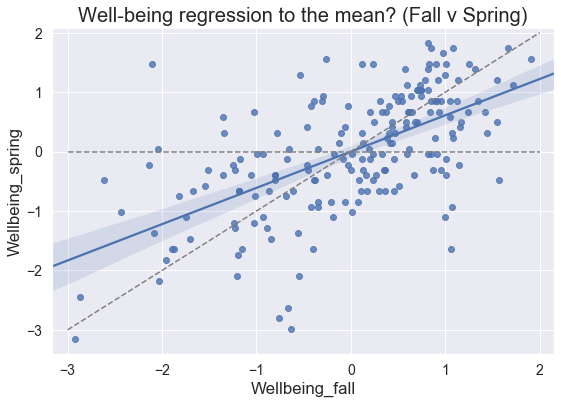

In [19]:
ax = sns.regplot('Wellbeing_fall', 'Wellbeing_spring', data=df)
ax.plot([-3, 2], [-3, 2], color='gray', linestyle='--', scalex=False, scaley=False);
ax.plot([-3, 2], [0, 0], color='gray', linestyle='--', scalex=False, scaley=False);
ax.set_title('Well-being regression to the mean? (Fall v Spring)')

Text(0.5, 1.0, 'Well-being regression to the mean? (Fall v Change)')

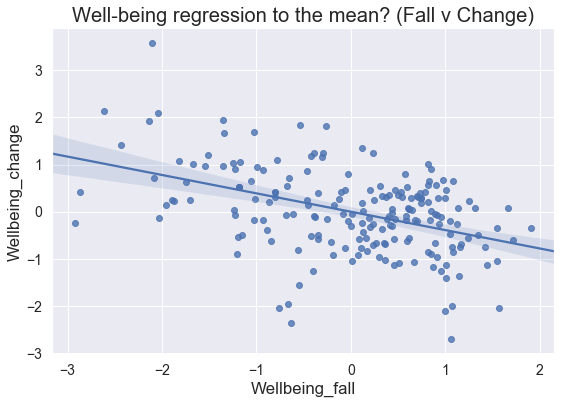

In [20]:
sns.regplot('Wellbeing_fall', 'Wellbeing_change', data=df)
plt.title('Well-being regression to the mean? (Fall v Change)')

#### Drop well-being-change columns, let the models figure out if it matters

In [21]:
df = df[[c for c in df if not c.startswith('Wellbeing_change')]]

## Impute the (small amount of) missing data

### How much data is missing? (A: Not much)

In [22]:
df.isnull().mean()

NID                              0.000000
Extraversion                     0.000000
Agreeableness                    0.000000
Openness                         0.000000
Conscientiousness                0.000000
NPI                              0.000000
Positive_empathy                 0.000000
Pos_efficacy                     0.000000
Neg_efficacy                     0.000000
Pos_tendency                     0.000000
Neg_Tendency                     0.000000
Need_Belong                      0.000000
Prosociality                     0.000000
Emp_theory                       0.000000
RS_1                             0.015306
RS_2                             0.015306
Self_Esteem                      0.000000
Self_monitor                     0.000000
Distress_Disclosure              0.000000
Guidance                         0.000000
Warmth                           0.000000
Integration                      0.000000
Attachment                       0.000000
Nurturance                       0

In [23]:
for c in df.columns:
    n_missing = df[c].isnull().sum()
    if n_missing > 0:
        print('Imputing %d (of %d) missing values for %s with the global mean' % (
            n_missing, len(df), c))
        df[c].fillna(df[c].mean(), inplace=True)

Imputing 3 (of 196) missing values for RS_1 with the global mean
Imputing 3 (of 196) missing values for RS_2 with the global mean


## Analyses: _individual_ as unit of analysis

### Correlations of individual features with spring well-being (partial - after controlling for fall well-being)

In [24]:
if SHUFFLE_WELLBEING:
    print("RANDOMLY SHUFFLING PARTICIPANT SPRING WELL-BEING SCORES")
    df['Wellbeing_spring'] = df['Wellbeing_spring'].sample(frac=1, replace=False).values

In [25]:
from sklearn import linear_model

In [26]:
def fit_and_score(frame, ivs, dv, base_r2=0):
    model = linear_model.LinearRegression()
    X = frame[ivs].values
    y = frame[dv].values
    model.fit(X, y)
    r2 = model.score(X, y)
    partial_r2 = (r2 - base_r2)/(1 - base_r2)
    return model, partial_r2

In [27]:
base_model, base_model_r2 = fit_and_score(df, ['Wellbeing_fall'], 'Wellbeing_spring')
print("Score:", base_model_r2)
print("Coefficients:", base_model.coef_)

Score: 0.3729316560630471
Coefficients: [0.6106813]


In [28]:
df.head()

,NID,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,4.2,2.666667,3.000000,6.250,5.500,3.1,19.0,3.071429,2.50,3.5,2.5,3.25,2.75,2.50,5.75,5.00,5.000000,4.25,2.375,4.857143,3.25,3.0,4.2,7.00,4.166667,5.833333,2.0,3.000000,5.50,2.166667,1.857143,1.428571,-1.818785,-0.752480
M9obKkDvc0,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,6.0,4.000000,3.000000,7.250,7.250,2.2,14.0,6.000000,5.00,5.0,5.0,5.00,5.00,5.00,5.00,5.00,5.000000,5.00,5.000,6.000000,5.00,5.0,5.0,8.00,8.000000,6.000000,6.0,6.000000,6.00,2.833333,2.571429,2.000000,0.851448,-0.039556
RdS4vMvQjo,9.0,3.0,6.0,6.5,6.0,3.533333,4.142857,5.50,6.75,5.50,5.00,4.0,2.750000,3.166667,4.625,5.375,1.8,10.0,2.857143,4.00,3.0,3.5,2.75,2.25,4.00,4.75,4.25,4.833333,3.75,3.500,2.857143,3.00,4.0,3.8,3.25,5.666667,3.166667,2.0,3.666667,2.00,2.500000,2.142857,1.285714,0.205617,0.673367
n08loMfJH7,4.0,4.0,5.5,6.5,6.5,4.000000,4.714286,6.00,6.75,5.50,5.25,4.0,3.000000,3.333333,6.250,5.375,2.0,13.0,3.000000,2.75,3.0,3.0,3.00,2.75,3.25,5.25,4.50,5.166667,4.50,4.000,3.857143,4.25,4.0,4.4,4.25,5.833333,4.000000,2.0,3.500000,2.25,2.833333,2.142857,0.857143,0.697224,0.495136
8rsekwqjFy,5.0,4.5,5.0,6.0,6.0,3.800000,5.000000,7.50,7.25,5.75,5.00,4.1,2.666667,3.666667,4.875,6.375,1.8,18.0,2.857143,3.50,3.0,3.5,3.00,3.00,3.00,5.00,4.50,5.333333,3.50,4.000,3.000000,4.00,4.5,4.8,5.25,6.166667,5.333333,2.0,5.000000,2.25,2.666667,2.142857,2.000000,0.820155,-0.039556


In [29]:
results = []
for c in df.columns:
    if c == 'NID' or c.startswith('Wellbeing_'):
        continue
    print(c, end=' ')
    model, score = fit_and_score(df, ['Wellbeing_fall', c], 'Wellbeing_spring', base_r2=base_model_r2)
    results.append([c, score, model.coef_[1], model.coef_[0]])
print()
results_indiv = pd.DataFrame(results)
results_indiv.columns = ['IV', 'Partial r²', r'$\beta$', r'$\beta_{WB}$']
results_indiv

Extraversion Agreeableness Openness Conscientiousness NPI Positive_empathy Pos_efficacy Neg_efficacy Pos_tendency Neg_Tendency Need_Belong Prosociality Emp_theory RS_1 RS_2 Self_Esteem Self_monitor Distress_Disclosure Guidance Warmth Integration Attachment Nurturance Reliable Anticipated_Risks Anticipated_Benefits PI SI CI BFNE BAS_drive BAS_Fun_seeking BAS_Fun_Reward_responsiveness Suppression Cogntive_Reappraisal Extensic_improve Extensic_worse Intrinsic_imrpove Intrinsic_worse Empathic_Concern Perspective_Taking Personal_Distress 


,IV,Partial r²,$\beta$,$\beta_{WB}$
0,Extraversion,0.000042,0.003506,0.610033
1,Agreeableness,0.025269,0.110928,0.598871
2,Openness,0.001579,0.026134,0.602863
3,Conscientiousness,0.006758,-0.081977,0.610205
4,NPI,0.001072,0.038762,0.606249
5,Positive_empathy,0.006705,0.078799,0.597639
6,Pos_efficacy,0.031412,0.140635,0.584721
7,Neg_efficacy,0.051896,0.186711,0.599016
8,Pos_tendency,0.056012,0.139345,0.597463
9,Neg_Tendency,0.044185,0.115958,0.599161


In [30]:
results_indiv.sort_values('Partial r²', ascending=False, inplace=True)
results_indiv.head(10)

,IV,Partial r²,$\beta$,$\beta_{WB}$
8,Pos_tendency,0.056012,0.139345,0.597463
7,Neg_efficacy,0.051896,0.186711,0.599016
9,Neg_Tendency,0.044185,0.115958,0.599161
26,PI,0.040856,0.275514,0.613834
23,Reliable,0.033046,0.291109,0.549662
6,Pos_efficacy,0.031412,0.140635,0.584721
27,SI,0.031385,0.202896,0.631364
25,Anticipated_Benefits,0.027785,0.162244,0.587524
33,Suppression,0.025523,-0.101311,0.594671
1,Agreeableness,0.025269,0.110928,0.598871


In [31]:
for name in results_indiv.head(10)['IV']:
    print("'%s', " % name, end='')

'Pos_tendency', 'Neg_efficacy', 'Neg_Tendency', 'PI', 'Reliable', 'Pos_efficacy', 'SI', 'Anticipated_Benefits', 'Suppression', 'Agreeableness', 

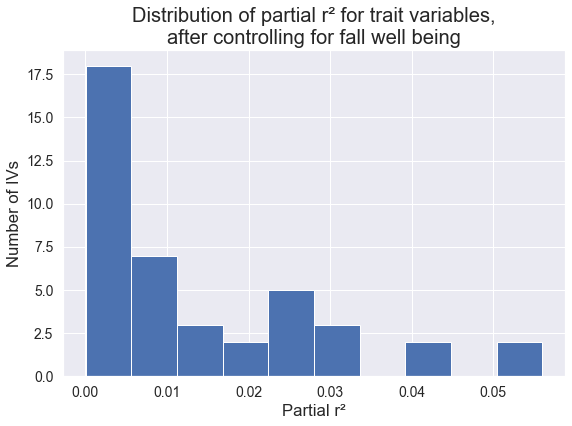

In [33]:
results_indiv['Partial r²'].hist()
plt.title("Distribution of partial r² for trait variables,\nafter controlling for fall well being")
plt.xlabel('Partial r²')
plt.ylabel('Number of IVs');

### Try using features of the dorm-mates' averages

In [34]:
if SHUFFLE_DORMS:
    print('RANDOMLY SHUFFLING DORM ASSIGNMENTS')
    df['NID'] = df['NID'].sample(frac=1, replace=False).values

#### For each P, we want to compute the mean traits of the *other* people in the dorm. This is a little annoying to do, but here goes

In [35]:
pid_to_dormmate_means = {}
for pid, nid in df['NID'].items():
    frame = df[df['NID'] == nid]
    frame = frame.drop(pid).drop(columns='NID')
    pid_to_dormmate_means[pid] = frame.mean()

In [36]:
df_dormmate_features = pd.DataFrame(pid_to_dormmate_means).T
df_dormmate_features.head()

,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring
vgxlTMkQs5,4.886364,5.045455,5.477273,5.818182,3.924242,4.811688,6.147727,6.340909,5.738636,4.693182,4.027273,2.712121,3.757576,4.576925,5.840556,2.145455,14.363636,3.272727,3.568182,3.352273,3.375000,3.340909,2.920455,3.568182,4.454545,4.227273,4.848485,4.306818,4.096591,3.967532,3.715909,3.897727,4.318182,5.000000,5.954545,4.780303,2.696970,4.492424,3.090909,2.598485,2.318182,1.714286,0.154550,0.223739
M9obKkDvc0,4.269231,5.038462,5.576923,5.538462,3.815385,4.527473,5.653846,5.846154,5.365385,4.653846,3.636752,2.641026,3.705128,4.057692,5.701923,2.092308,11.923077,3.197802,3.346154,3.250000,3.423077,3.461538,3.269231,3.500000,4.211538,4.442308,4.923077,4.173077,4.278846,3.648352,3.557692,3.692308,4.169231,5.403846,5.910256,4.743590,2.717949,4.512821,2.750000,2.666667,2.571429,1.549451,0.307379,0.268920
RdS4vMvQjo,4.500000,4.900000,6.200000,5.000000,3.186667,4.514286,5.050000,5.650000,4.200000,3.700000,3.620000,2.566667,4.166667,4.675000,5.575000,2.500000,11.200000,3.171429,2.950000,3.100000,3.000000,3.100000,2.750000,2.900000,5.150000,4.250000,5.000000,4.100000,4.150000,4.571429,3.400000,3.450000,4.320000,4.950000,5.700000,4.666667,2.533333,3.466667,3.150000,2.600000,2.714286,2.228571,-0.098011,-0.538603
n08loMfJH7,3.750000,4.916667,4.800000,5.666667,3.488376,4.457143,6.125000,6.408333,5.983333,4.675000,3.966667,2.650000,3.711111,5.108657,5.316149,2.320000,11.766667,3.266667,3.241667,3.116667,3.258333,3.358333,2.766667,3.375000,4.566667,4.400000,4.805556,4.041667,3.850000,4.109524,3.525000,3.841667,4.180000,5.066667,5.433333,4.338889,2.433333,4.000000,3.141667,2.666667,2.576190,2.066667,0.008659,0.025795
8rsekwqjFy,3.857143,5.142857,5.142857,5.500000,3.880952,4.724490,6.357143,6.714286,5.875000,4.839286,4.128571,2.732143,3.416667,4.732143,5.330357,2.207143,15.071429,3.581633,3.428571,3.089286,3.285714,3.375000,2.946429,3.500000,4.517857,4.303571,5.130952,4.607143,3.875000,4.479592,3.910714,4.089286,4.500000,5.250000,5.750000,5.130952,2.500000,4.083333,3.357143,2.785714,2.561224,1.765306,-0.032172,0.011367


#### Spot check one participant

In [37]:
sample_pid = 'vgxlTMkQs5'
sample_p_extraversion = df.loc['vgxlTMkQs5', 'Extraversion']
sample_dorm_extraversion = df.groupby('NID')['Extraversion'].mean().loc[df.loc[sample_pid, 'NID']]
sample_dorm_extraversion_without_p = df_dormmate_features.loc['vgxlTMkQs5', 'Extraversion']
print(sample_pid, sample_p_extraversion, sample_dorm_extraversion, sample_dorm_extraversion_without_p)

vgxlTMkQs5 4.0 4.8478260869565215 4.886363636363637


#### Merge individual features and dormmate features

In [38]:
assert(set(df_dormmate_features.index) == set(df.index))

In [39]:
df_indiv_full = pd.merge(df, df_dormmate_features, left_index=True, right_index=True, suffixes=['_self', '_dormmates'])
df_indiv_full.head()

,NID,Extraversion_self,Agreeableness_self,Openness_self,Conscientiousness_self,NPI_self,Positive_empathy_self,Pos_efficacy_self,Neg_efficacy_self,Pos_tendency_self,Neg_Tendency_self,Need_Belong_self,Prosociality_self,Emp_theory_self,RS_1_self,RS_2_self,Self_Esteem_self,Self_monitor_self,Distress_Disclosure_self,Guidance_self,Warmth_self,Integration_self,Attachment_self,Nurturance_self,Reliable_self,Anticipated_Risks_self,Anticipated_Benefits_self,PI_self,SI_self,CI_self,BFNE_self,BAS_drive_self,BAS_Fun_seeking_self,BAS_Fun_Reward_responsiveness_self,Suppression_self,Cogntive_Reappraisal_self,Extensic_improve_self,Extensic_worse_self,Intrinsic_imrpove_self,Intrinsic_worse_self,Empathic_Concern_self,Perspective_Taking_self,Personal_Distress_self,Wellbeing_fall_self,Wellbeing_spring_self,Extraversion_dormmates,Agreeableness_dormmates,Openness_dormmates,Conscientiousness_dormmates,NPI_dormmates,Positive_empathy_dormmates,Pos_efficacy_dormmates,Neg_efficacy_dormmates,Pos_tendency_dormmates,Neg_Tendency_dormmates,Need_Belong_dormmates,Prosociality_dormmates,Emp_theory_dormmates,RS_1_dormmates,RS_2_dormmates,Self_Esteem_dormmates,Self_monitor_dormmates,Distress_Disclosure_dormmates,Guidance_dormmates,Warmth_dormmates,Integration_dormmates,Attachment_dormmates,Nurturance_dormmates,Reliable_dormmates,Anticipated_Risks_dormmates,Anticipated_Benefits_dormmates,PI_dormmates,SI_dormmates,CI_dormmates,BFNE_dormmates,BAS_drive_dormmates,BAS_Fun_seeking_dormmates,BAS_Fun_Reward_responsiveness_dormmates,Suppression_dormmates,Cogntive_Reappraisal_dormmates,Extensic_improve_dormmates,Extensic_worse_dormmates,Intrinsic_imrpove_dormmates,Intrinsic_worse_dormmates,Empathic_Concern_dormmates,Perspective_Taking_dormmates,Personal_Distress_dormmates,Wellbeing_fall_dormmates,Wellbeing_spring_dormmates
vgxlTMkQs5,7.0,4.0,4.0,5.5,4.5,4.333333,5.142857,7.50,6.25,5.25,3.75,4.2,2.666667,3.000000,6.250,5.500,3.1,19.0,3.071429,2.50,3.5,2.5,3.25,2.75,2.50,5.75,5.00,5.000000,4.25,2.375,4.857143,3.25,3.0,4.2,7.00,4.166667,5.833333,2.0,3.000000,5.50,2.166667,1.857143,1.428571,-1.818785,-0.752480,4.886364,5.045455,5.477273,5.818182,3.924242,4.811688,6.147727,6.340909,5.738636,4.693182,4.027273,2.712121,3.757576,4.576925,5.840556,2.145455,14.363636,3.272727,3.568182,3.352273,3.375000,3.340909,2.920455,3.568182,4.454545,4.227273,4.848485,4.306818,4.096591,3.967532,3.715909,3.897727,4.318182,5.000000,5.954545,4.780303,2.696970,4.492424,3.090909,2.598485,2.318182,1.714286,0.154550,0.223739
M9obKkDvc0,11.0,6.0,4.5,5.0,5.5,6.000000,5.000000,7.25,7.25,8.00,7.50,6.0,4.000000,3.000000,7.250,7.250,2.2,14.0,6.000000,5.00,5.0,5.0,5.00,5.00,5.00,5.00,5.00,5.000000,5.00,5.000,6.000000,5.00,5.0,5.0,8.00,8.000000,6.000000,6.0,6.000000,6.00,2.833333,2.571429,2.000000,0.851448,-0.039556,4.269231,5.038462,5.576923,5.538462,3.815385,4.527473,5.653846,5.846154,5.365385,4.653846,3.636752,2.641026,3.705128,4.057692,5.701923,2.092308,11.923077,3.197802,3.346154,3.250000,3.423077,3.461538,3.269231,3.500000,4.211538,4.442308,4.923077,4.173077,4.278846,3.648352,3.557692,3.692308,4.169231,5.403846,5.910256,4.743590,2.717949,4.512821,2.750000,2.666667,2.571429,1.549451,0.307379,0.268920
RdS4vMvQjo,9.0,3.0,6.0,6.5,6.0,3.533333,4.142857,5.50,6.75,5.50,5.00,4.0,2.750000,3.166667,4.625,5.375,1.8,10.0,2.857143,4.00,3.0,3.5,2.75,2.25,4.00,4.75,4.25,4.833333,3.75,3.500,2.857143,3.00,4.0,3.8,3.25,5.666667,3.166667,2.0,3.666667,2.00,2.500000,2.142857,1.285714,0.205617,0.673367,4.500000,4.900000,6.200000,5.000000,3.186667,4.514286,5.050000,5.650000,4.200000,3.700000,3.620000,2.566667,4.166667,4.675000,5.575000,2.500000,11.200000,3.171429,2.950000,3.100000,3.000000,3.100000,2.750000,2.900000,5.150000,4.250000,5.000000,4.100000,4.150000,4.571429,3.400000,3.450000,4.320000,4.950000,5.700000,4.666667,2.533333,3.466667,3.150000,2.600000,2.714286,2.228571,-0.098011,-0.538603
n08loMfJH7,4.0,4.0,5.5,6.5,6.5,4.000000,4.714286,6.00,6.75,5.50,5.25,4.0,3.000000,3.333333,6.250,5.375,2.0,13.0,3.000000,2.75,3.0,3.0,3

#### Run correlations

In [40]:
results = []
for c in df_indiv_full.columns:
    if (not c.endswith('_dormmates')) or c.startswith('Wellbeing_change'):
        continue
    print(c, end=' ')
    model, score = fit_and_score(
        df_indiv_full, ['Wellbeing_fall_self', c],
        'Wellbeing_spring_self', base_r2=base_model_r2)
    results.append([c, score, model.coef_[1], model.coef_[0]])
print()
results_dormmates = pd.DataFrame(results)
results_dormmates.columns = ['IV', 'Partial r²', r'$\beta$', r'$\beta_{WB}$']
results_dormmates.sort_values('Partial r²', ascending=False, inplace=True)
results_dormmates.head(10)

Extraversion_dormmates Agreeableness_dormmates Openness_dormmates Conscientiousness_dormmates NPI_dormmates Positive_empathy_dormmates Pos_efficacy_dormmates Neg_efficacy_dormmates Pos_tendency_dormmates Neg_Tendency_dormmates Need_Belong_dormmates Prosociality_dormmates Emp_theory_dormmates RS_1_dormmates RS_2_dormmates Self_Esteem_dormmates Self_monitor_dormmates Distress_Disclosure_dormmates Guidance_dormmates Warmth_dormmates Integration_dormmates Attachment_dormmates Nurturance_dormmates Reliable_dormmates Anticipated_Risks_dormmates Anticipated_Benefits_dormmates PI_dormmates SI_dormmates CI_dormmates BFNE_dormmates BAS_drive_dormmates BAS_Fun_seeking_dormmates BAS_Fun_Reward_responsiveness_dormmates Suppression_dormmates Cogntive_Reappraisal_dormmates Extensic_improve_dormmates Extensic_worse_dormmates Intrinsic_imrpove_dormmates Intrinsic_worse_dormmates Empathic_Concern_dormmates Perspective_Taking_dormmates Personal_Distress_dormmates Wellbeing_fall_dormmates Wellbeing_spring

,IV,Partial r²,$\beta$,$\beta_{WB}$
15,Self_Esteem_dormmates,0.046607,-1.487795,0.624088
42,Wellbeing_fall_dormmates,0.032924,0.683706,0.622461
12,Emp_theory_dormmates,0.029948,-0.526127,0.597095
29,BFNE_dormmates,0.019366,-0.582517,0.622326
23,Reliable_dormmates,0.015202,0.840880,0.612995
9,Neg_Tendency_dormmates,0.012674,0.236716,0.610516
24,Anticipated_Risks_dormmates,0.012631,-0.352956,0.607183
43,Wellbeing_spring_dormmates,0.012536,0.282660,0.605120
14,RS_2_dormmates,0.012198,0.366598,0.610207
37,Intrinsic_imrpove_dormmates,0.012097,0.342878,0.612197


In [41]:
for name in results_dormmates.head(10)['IV']:
    print("'%s', " % name, end='')

'Self_Esteem_dormmates', 'Wellbeing_fall_dormmates', 'Emp_theory_dormmates', 'BFNE_dormmates', 'Reliable_dormmates', 'Neg_Tendency_dormmates', 'Anticipated_Risks_dormmates', 'Wellbeing_spring_dormmates', 'RS_2_dormmates', 'Intrinsic_imrpove_dormmates', 

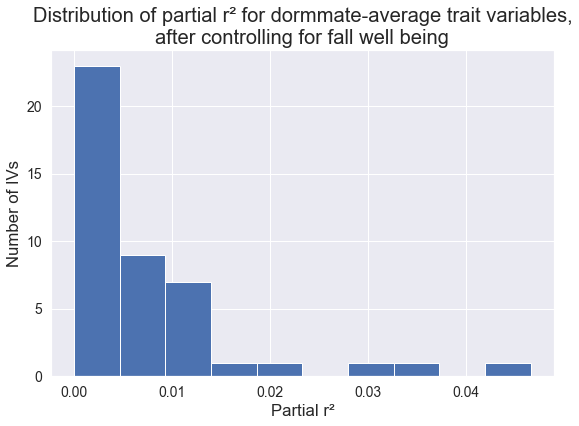

In [43]:
results_dormmates['Partial r²'].hist()
plt.title("Distribution of partial r² for dormmate-average trait variables,\nafter controlling for fall well being")
plt.xlabel('Partial r²')
plt.ylabel('Number of IVs');

### Omnibus models: full-on machine learning

* Use "leave-one-dorm-out" cross-validation
* Use LASSO regression, which tends to send most coefficients to zero

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [45]:
print("Dorms and participant counts")
df_indiv_full['NID'].value_counts().sort_index()

Dorms and participant counts


1.0     13
2.0     22
4.0     31
5.0     15
7.0     23
8.0     21
9.0      6
10.0    16
11.0    14
13.0    20
15.0    15
Name: NID, dtype: int64

In [46]:
dorms = sorted(set(df_indiv_full['NID']))
dorms

[1.0, 2.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 15.0]

In [47]:
drop_cols = ['NID', 'Wellbeing_spring_self']
top_cols = [
    'Wellbeing_fall_self', 'Wellbeing_spring_dormmates',
    'Pos_tendency_self', 'Neg_efficacy_self', 'Neg_Tendency_self',
    'PI_self', 'Reliable_self', 'Pos_efficacy_self', 'SI_self',
    'Self_Esteem_dormmates', 'Wellbeing_fall_dormmates', 'Emp_theory_dormmates']

results = []
print('alpha = ', end=' ')
for a in np.logspace(-3, 1, num=30):
    scores = []
    print('%.04f' % a, end=' ')
    for test_dorm in dorms:
        df_train = df_indiv_full[df_indiv_full['NID'] != test_dorm]
#         X_train = df_train.drop(columns=drop_cols).values
        X_train = df_train[top_cols]
#         X_train= df_train[['Wellbeing_fall_self']].values
        y_train = df_train['Wellbeing_spring_self'].values
    
        df_test = df_indiv_full[df_indiv_full['NID'] == test_dorm]
#         X_test= df_test.drop(columns=drop_cols).values
        X_test = df_test[top_cols]
#         X_test= df_test[['Wellbeing_fall_self']].values
        y_test = df_test['Wellbeing_spring_self'].values
    
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        model = linear_model.Lasso(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = ((y_pred - y_test) ** 2).mean()
        mse_base = ((np.mean(df_indiv_full['Wellbeing_spring_self']) - y_test) ** 2).mean()
        r2 = (mse_base - mse)/mse_base
#         print(mse, mse_base, r2)
        scores.append(r2)
    results.append([a, np.mean(scores)])

results = pd.DataFrame(results, columns=['alpha', 'r²'])

alpha =  0.0010 0.0014 0.0019 0.0026 0.0036 0.0049 0.0067 0.0092 0.0127 0.0174 0.0240 0.0329 0.0452 0.0621 0.0853 0.1172 0.1610 0.2212 0.3039 0.4175 0.5736 0.7880 1.0826 1.4874 2.0434 2.8072 3.8566 5.2983 7.2790 10.0000 

In [48]:
results

,alpha,r²
0,0.001000,0.313873
1,0.001374,0.315636
2,0.001887,0.317999
3,0.002593,0.321094
4,0.003562,0.325120
5,0.004894,0.330299
6,0.006723,0.336886
7,0.009237,0.345089
8,0.012690,0.354704
9,0.017433,0.363352


In [49]:
best = results.sort_values('r²').iloc[-1]
best_alpha = best['alpha']
best

alpha    0.032903
r²       0.370533
Name: 11, dtype: float64

In [56]:
best = results.sort_values('r²').iloc[-1]
best_alpha = best['alpha']
best

alpha    0.032903
r²       0.324153
Name: 5, dtype: float64

In [52]:
a = .324
b = .375
(b - a) / (1 - a)

0.07544378698224852

### Inspect best-fit model

In [53]:
# X = df_indiv_full.drop(columns=drop_cols).values
X = df_indiv_full[top_cols].values
y = df_indiv_full['Wellbeing_spring_self'].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

model = linear_model.Lasso(alpha=best_alpha)
model.fit(X, y)
model.score(X, y)

0.471484596499046

In [54]:
# coef_names = df_indiv_full.drop(columns=drop_cols).columns
coef_names = top_cols
frame = pd.DataFrame(zip(coef_names, model.coef_), columns=['IV', 'coef'])
# zero_count = (frame['coef'] == 0).sum()
# print('%d features dropped to zero. %d remain' % (zero_count, len(frame) - zero_count))
# frame = frame[frame['coef'] != 0]
frame['coef_abs'] = frame['coef'].apply(np.abs)
frame = frame.sort_values('coef_abs', ascending=False).drop(columns='coef_abs')
frame.rename(columns={'coef': r'$\beta$'})

,IV,$\beta$
0,Wellbeing_fall_self,0.545748
10,Wellbeing_fall_dormmates,0.097306
2,Pos_tendency_self,0.086265
3,Neg_efficacy_self,0.080773
6,Reliable_self,0.072791
11,Emp_theory_dormmates,-0.065009
9,Self_Esteem_dormmates,-0.062426
5,PI_self,0.059416
1,Wellbeing_spring_dormmates,-0.036286
4,Neg_Tendency_self,0.009325


## Analyses: _dorm_ as unit of analysis (INCOMPLETE)

### Compute dorm averages

In [48]:
dorm_means = df.groupby('NID').mean()
dorm_sizes = df.groupby('NID').size()
dorm_means.insert(0, 'NumParticipants', dorm_sizes)
dorm_means

,NumParticipants,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring
NID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,13,4.576923,5.038462,5.307692,5.615385,4.020513,4.648352,6.884615,7.173077,5.903846,4.961538,4.384615,2.910256,3.846154,4.836538,5.490385,2.100000,14.153846,3.296703,3.615385,3.403846,3.480769,3.346154,3.250000,3.576923,4.288462,4.711538,5.256410,4.634615,3.884615,3.846154,4.000000,4.250000,4.384615,5.038462,6.102564,5.076923,2.692308,4.525641,3.096154,2.820513,2.758242,1.340659,0.081220,0.371746
2.0,22,3.772727,5.227273,5.181818,5.340909,3.806061,4.831169,6.238636,6.875000,6.159091,5.488636,4.004545,2.950758,3.916667,4.732955,5.687500,2.204545,12.727273,3.379870,3.465909,3.329545,3.250000,3.204545,3.000000,3.590909,4.261364,4.772727,5.106061,4.318182,3.943182,3.954545,3.863636,3.875000,4.436364,4.375000,5.712121,4.825758,2.515152,4.227273,3.318182,2.765152,2.603896,1.837662,0.060306,0.239942
4.0,31,3.758065,4.935484,4.854839,5.693548,3.504880,4.465438,6.120968,6.419355,5.967742,4.693548,3.967742,2.661290,3.698925,5.145475,5.318047,2.309677,11.806452,3.258065,3.225806,3.112903,3.250000,3.346774,2.766129,3.370968,4.588710,4.403226,4.817204,4.056452,3.854839,4.101382,3.548387,3.846774,4.187097,5.040323,5.446237,4.327957,2.419355,3.983871,3.112903,2.672043,2.562212,2.027650,0.030871,0.040935
5.0,15,3.900000,5.133333,5.200000,5.533333,3.875556,4.742857,6.433333,6.750000,5.866667,4.850000,4.126667,2.727778,3.433333,4.741667,5.400000,2.180000,15.266667,3.533333,3.433333,3.083333,3.300000,3.350000,2.950000,3.466667,4.550000,4.316667,5.144444,4.533333,3.883333,4.380952,3.916667,4.116667,4.520000,5.250000,5.777778,5.144444,2.466667,4.144444,3.283333,2.777778,2.533333,1.780952,0.024649,0.007972
7.0,23,4.847826,5.000000,5.478261,5.760870,3.942029,4.826087,6.206522,6.336957,5.717391,4.652174,4.034783,2.710145,3.724638,4.649668,5.825749,2.186957,14.565217,3.263975,3.521739,3.358696,3.336957,3.336957,2.913043,3.521739,4.510870,4.260870,4.855072,4.304348,4.021739,4.006211,3.695652,3.858696,4.313043,5.086957,5.876812,4.826087,2.666667,4.427536,3.195652,2.579710,2.298137,1.701863,0.068753,0.181295
8.0,21,3.761905,5.142857,5.309524,5.428571,3.882540,4.945578,6.464286,6.821429,5.726190,4.880952,4.028571,3.055556,4.182540,4.946429,5.434524,2.385714,13.285714,3.350340,3.476190,3.357143,3.464286,3.297619,3.214286,3.440476,4.452381,4.535714,5.007937,4.238095,4.142857,4.374150,3.666667,3.988095,4.333333,4.666667,5.658730,5.126984,2.428571,4.341270,3.273810,2.920635,2.687075,1.727891,-0.180626,-0.446941
9.0,6,4.250000,5.083333,6.250000,5.166667,3.244444,4.452381,5.125000,5.833333,4.416667,3.916667,3.683333,2.597222,4.000000,4.666667,5.541667,2.383333,11.000000,3.119048,3.125000,3.083333,3.083333,3.041667,2.666667,3.083333,5.083333,4.250000,4.972222,4.041667,4.041667,4.285714,3.333333,3.541667,4.233333,4.666667,5.694444,4.416667,2.444444,3.500000,2.958333,2.583333,2.619048,2.071429,-0.047406,-0.336608
10.0,16,4.312500,4.593750,5.406250,5.218750,3.866667,5.080357,6.546875,6.875000,6.546875,5.171875,4.331250,2.744792,3.427083,4.937500,5.703125,2.268750,12.250000,3.258929,3.578125,3.484375,3.406250,3.359375,2.968750,3.437500,4.453125,4.718750,4.854167,4.281250,3.984375,4.232143,3.578125,3.906250,4.587500,4.734375,5.427083,4.718750,2.312500,4.250000,3.156250,2.729167,2.508929,1.964286,-0.422089,-0.290193
11.0,14,4.392857,5.000000,5.535714,5.535714,3.971429,4.561224,5.767857,5.946429,5.553571,4.857143,3.805556,2.738095,3.654762,

### First-order correlations with spring well-being

In [49]:
dorm_corrs = dorm_means.corr()['Wellbeing_spring'].drop('Wellbeing_spring')
# To simply sort by the absolute value, we have to do some gymnastics
dorm_corrs.name = 'corr'
frame = pd.DataFrame(index=dorm_corrs.index)
frame['corr'] = dorm_corrs
frame['corr_abs'] = dorm_corrs.abs()
frame.sort_values('corr_abs', ascending=False, inplace=True)
frame.head(11)

,corr,corr_abs
Self_Esteem,-0.888931,0.888931
Wellbeing_fall,0.811057,0.811057
Reliable,0.682214,0.682214
Anticipated_Risks,-0.622641,0.622641
BFNE,-0.600017,0.600017
Personal_Distress,-0.542642,0.542642
RS_1,-0.503629,0.503629
Intrinsic_imrpove,0.496444,0.496444
Neg_Tendency,0.474762,0.474762
RS_2,0.453776,0.453776


In [50]:
dorm_corrs

NumParticipants                  0.024418
Extraversion                     0.287592
Agreeableness                    0.209035
Openness                        -0.295989
Conscientiousness                0.153600
NPI                              0.271579
Positive_empathy                -0.210152
Pos_efficacy                     0.323517
Neg_efficacy                     0.184288
Pos_tendency                     0.295727
Neg_Tendency                     0.474762
Need_Belong                     -0.011705
Prosociality                     0.041028
Emp_theory                      -0.385772
RS_1                            -0.503629
RS_2                             0.453776
Self_Esteem                     -0.888931
Self_monitor                     0.130026
Distress_Disclosure              0.450901
Guidance                         0.439921
Warmth                           0.199561
Integration                      0.393417
Attachment                       0.385049
Nurturance                       0